## 使用XGBoost,
* Score=687.2922

In [1]:
import pandas as pd

In [2]:
#数据读取
train_data1=pd.read_csv('used_car_train_20200313.csv')# 直接读不用sep会发现有很多空格

In [3]:
train_data1

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...
...,...
149995,149995 163978 20000607 121.0 10 4.0 0.0 1.0 16...
149996,149996 184535 20091102 116.0 11 0.0 0.0 0.0 12...
149997,149997 147587 20101003 60.0 11 1.0 1.0 0.0 90 ...
149998,149998 45907 20060312 34.0 10 3.0 1.0 0.0 156 ...


### 上面发现有很多空格，所以需要用sep=' '通过空格将数据更好地读取进来

In [4]:
train_data=pd.read_csv('used_car_train_20200313.csv',sep=' ')
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [5]:
test_data=pd.read_csv('used_car_testB_20200421.csv',sep=' ')
test_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


### 数据探索data exploration
* 数据缺失值
* price的分布（describe）
* 唯一值个数
* 关键特征(从业务角度出发)


In [6]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [7]:
#筛选一下，只找缺失值大于0的部分
#缺失值：有四个字段缺失，model，bodyType，fuelType，gearbox，   
missing=train_data.isnull().sum()
missing[missing>0]

model          1
bodyType    4506
fuelType    8680
gearbox     5981
dtype: int64

In [8]:
#针对具体的某个字段像具体了解下
#如果要做one-hot=》会多出来7905个特征
train_data['regionCode'].value_counts()

419     369
764     258
125     137
176     136
462     134
       ... 
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64

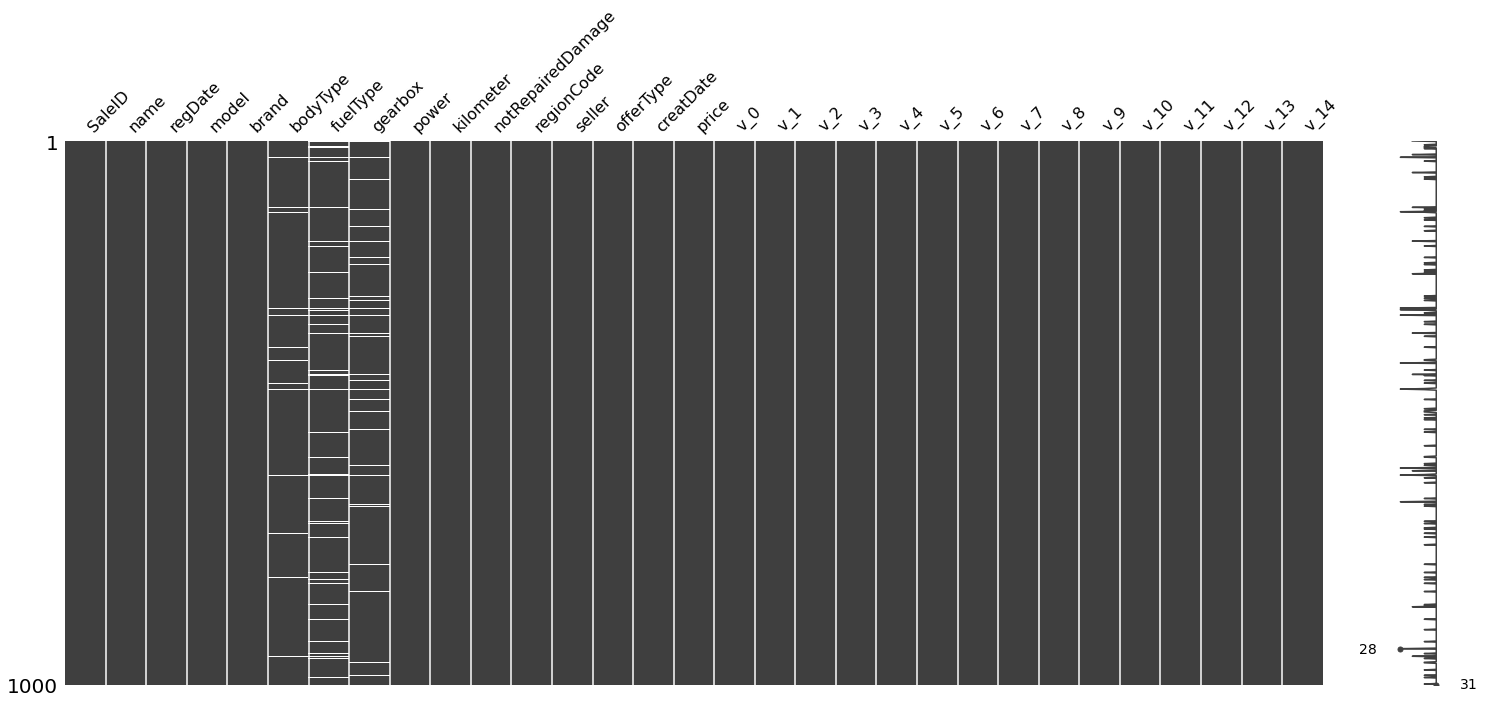

In [9]:
#sample 随机抽取数据
import matplotlib.pyplot as plt
import missingno as msno
sample=train_data.sample(1000)
msno.matrix(sample)
plt.show()

## 如果针对缺失值
* 1）数值类型=> 可以用平均值，中位数来填充（收入为例：需要用中位数，因为平均值会受到异常值的干扰）
* 2）分类类型=> 譬如在某个城市，众数

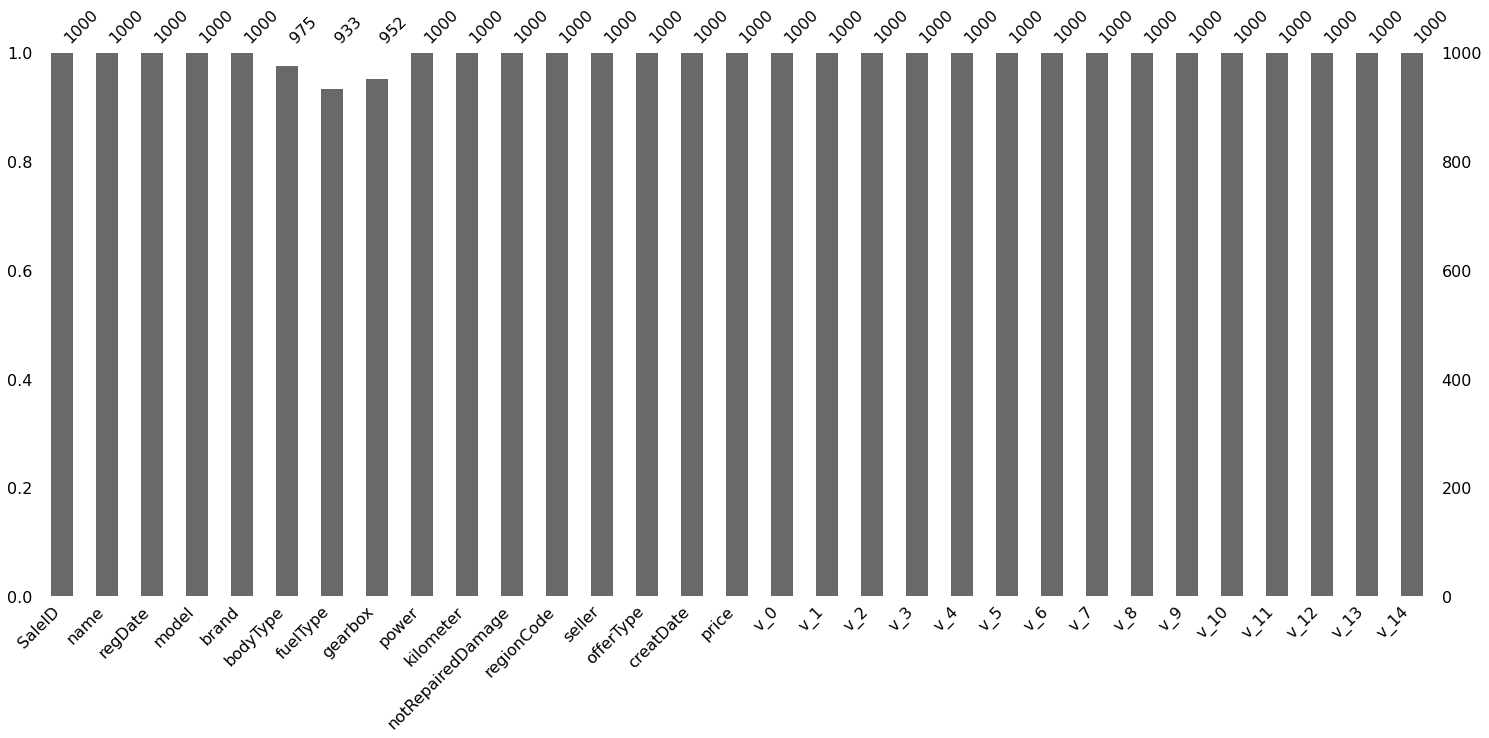

In [10]:
msno.bar(sample)
plt.show()

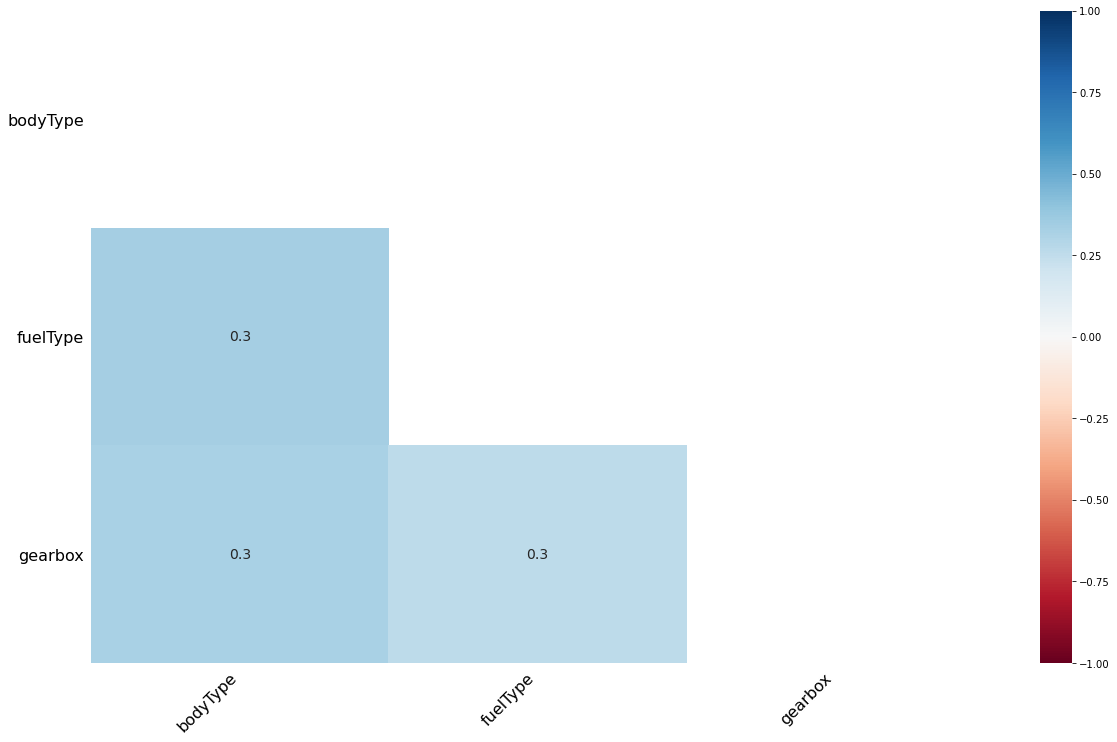

In [11]:
msno.heatmap(sample) #heatmap也是看缺失值的一个工具
plt.show()

In [12]:
print(train_data['notRepairedDamage'].value_counts()) #这里出现了0和1以外的一个‘-’,虽然在计算机里不算缺失值，但是其实登记上去就表示缺失，不了解
print(train_data['notRepairedDamage'].isnull().sum())

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64
0


In [13]:
#对数据的字段类型进行查看
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [14]:
#还有一种方式专门查看数据类型
# O代表Object,字符串类型
train_data.select_dtypes(include='O').columns#这个‘O’要大写

Index(['notRepairedDamage'], dtype='object')

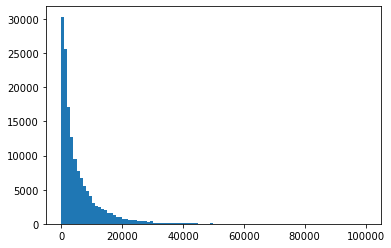

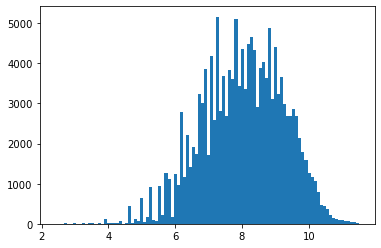

In [15]:
import numpy as np
## 对price进行探索
plt.hist(train_data['price'],bins=100) #这个图横坐标代表价格，纵坐标代表数量
plt.show()
#对log(price)进行直方图呈现
plt.hist(np.log(train_data['price']),bins=100)
plt.show()

### 向上面从第一个柱状图可以看出，数据可能分为两个部分，前一部分到40000为止可能是log()型的，但后面从40000之后
### 可能又是另一个分布了，所以可以将整组数据分为两段来看，把后面那段提取出来，这个可能也是一种思路。

In [16]:
# x1在训练集的分布，和测试集里的分布不一样
# 譬如训练集年龄普遍小于18岁，x1(age<18), 但测试集年龄（age>50）
# 思路:
# 如果训练数据集数据很多，可以筛选出来age>50的多一些

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.346487
Kurtosis: 18.995183


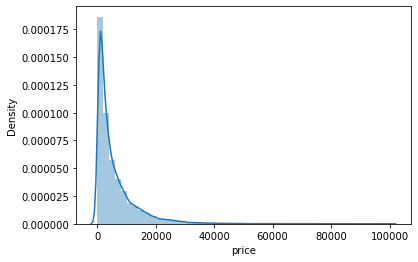

In [17]:
import seaborn as sns

#不属于标准正态分布
sns.distplot(train_data['price'])
print('Skewness: %f'%train_data['price'].skew())
print('Kurtosis: %f'%train_data['price'].kurt())

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.265100
Kurtosis: -0.171801


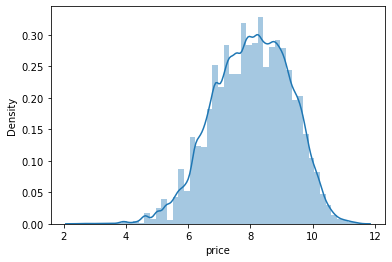

In [18]:
# 取log后近似正太分布了
sns.distplot(np.log(train_data['price']))
print('Skewness: %f'%np.log(train_data['price']).skew())
print('Kurtosis: %f'%np.log(train_data['price']).kurt())

In [19]:
# 一行代码生成报告
import pandas_profiling as pp
pp.ProfileReport(train_data)

KeyboardInterrupt: 

<Figure size 576x396 with 0 Axes>

In [19]:
#上面是通过直接生成分析报告来
#现在也可以自己做一些分析

for col in train_data.columns.tolist():#变成list了
    num=train_data[col].nunique() #看唯一值的个数
    if num < 2:
        print(col,num, '======================') #引起注意
    else:
        print(col,num) 

SaleID 150000
name 99662
regDate 3894
model 248
brand 40
bodyType 8
fuelType 7
gearbox 2
power 566
kilometer 13
notRepairedDamage 3
regionCode 7905
seller 2
offerType 1 ======================
creatDate 96
price 3763
v_0 143997
v_1 143998
v_2 143997
v_3 143998
v_4 143998
v_5 139624
v_6 109766
v_7 138709
v_8 142451
v_9 140617
v_10 143997
v_11 143997
v_12 143997
v_13 143998
v_14 143998


In [20]:
# 之前使用过的可以总结方便后面使用
# missingno, pandas_profiling, isnull().sum()
# 去掉offerType,SaleID这个字段，没啥用
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [21]:
train_data['SaleID'].value_counts()

2047      1
113949    1
15661     1
13612     1
3371      1
         ..
8913      1
10960     1
53967     1
56014     1
0         1
Name: SaleID, Length: 150000, dtype: int64

In [22]:
#不要忘记对test_data也做缺失值处理
test_data['notRepairedDamage'].replace('-','0.0',inplace=True)

In [23]:
# 对notRepairedDamage 缺失值进行填充

print(train_data['notRepairedDamage'].replace('-','0.0',inplace=True))

None


In [24]:
train_data['notRepairedDamage'].value_counts()

0.0    135685
1.0     14315
Name: notRepairedDamage, dtype: int64

In [25]:
numerical_cols=train_data.select_dtypes(exclude='object').columns.tolist()
print(numerical_cols)
categorical_cols=train_data.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
['notRepairedDamage']


In [26]:
# 对于object类型的特征，更改数据类型
train_data.select_dtypes(include='O')
#使用astype进行数据类型的更换
train_data['notRepairedDamage']=train_data['notRepairedDamage'].astype('float64')
test_data['notRepairedDamage']=test_data['notRepairedDamage'].astype('float64')

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  float64
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [28]:
feature_cols=train_data.columns.tolist()
print(feature_cols)
feature_cols=['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
#提取特征列
X_data=train_data[feature_cols]
X_test=test_data[feature_cols]
Y_data=train_data['price']

['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']


In [29]:
#统计price的分布
def show_stats(data):
    print('min',np.min(data))
    print('max',np.max(data))
    print('ptp',np.ptp(data)) #计算最大值与最小值的差(极差) peak to peak
    print('mean',np.mean(data))
    print('std',np.std(data)) #标准差
    print('median',np.median(data))
#查询price的统计
show_stats(Y_data)

min 11
max 99999
ptp 99988
mean 5923.327333333334
std 7501.973469876438
median 3250.0


In [30]:
## 数据集切分
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(X_data,Y_data,test_size=0.2,random_state=2021)

In [31]:
import xgboost as xgb
#创建xgb模型
xgb=xgb.XGBRegressor(max_depth=6, learning_rate=0.01,n_estimators=2000,
                     objective='reg:linear',tree_method='gpu_hist',
                     subsample=0.8,colsample_bytree=0.8,
                    min_child_samples=3, eval_metric='auc',reg_lambda=0.5)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_val)

[12:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_child_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [32]:
#模型评估
from sklearn.metrics import mean_absolute_error
show_stats(y_pred)
# val MAE=594
mean_absolute_error(y_pred,y_val)

min -3251.7024
max 87485.21
ptp 90736.914
mean 5913.488
std 7319.748
median 3316.8887


594.3235153275052

In [33]:
## 针对树模型，不需要标准化
## 如果模型和距离相关（LR，KNN，SVM）=>需要对特征进行标准化

## 如果不切分数据，就无法对模型进行评估（属于offline评估）
## 如果切分数据集，没有过拟合=> 使用全量数据，也没有过拟合
## 如果切分数据集，发现过拟合=> 调整model的超参数（比如n_estimators减少，直到不发生过拟合）
## 将适合的n_estimators,设置给全量数据的模型

In [34]:
#重新训练模型,使用全量数据
#创建xgb模型
xgb.fit(X_data,Y_data)
y_pred=xgb.predict(X_test)
show_stats(y_pred)

[12:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_child_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


min -736.18427
max 90663.76
ptp 91399.945
mean 5908.039
std 7349.7686
median 3267.415


In [35]:
#输出结果
result=pd.DataFrame(columns=['SaleID','price'])
result['SaleID']=test_data['SaleID']
result['price']=y_pred


In [36]:
result.loc[result['price']<11,'price']=11 #将结果中price<11的部分重新定义为11
result.to_csv('./xgb_baseline1.csv',index=False)

### 将训练好的模型保存下来 以便下次用

In [37]:
#将训练好的模型以pkl格式保存下来
import pickle
with open('xgb_model.pkl','wb') as file:
    pickle.dump(xgb,file)

In [38]:
# 然后用pickle把之前保存好的模型load进来
import pickle
with open('xgb_model.pkl','rb') as file:
    xgb=pickle.load(file)
y_pred=xgb.predict(X_test)
y_pred

array([1317.1553, 1838.4816, 8615.992 , ..., 5803.4336, 5243.279 ,
       5199.3804], dtype=float32)

In [39]:
#X_data, Y_data,X_test
X_data.to_pickle('X_data.pkl')
Y_data.to_pickle('Y_data.pkl')
X_test.to_pickle('X_test.pkl')